In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import sys
import os
base_dir = os.getcwd()
repo_name = "chicago_data"
root_path =base_dir.split(repo_name)[0] + repo_name 
sys.path.append(root_path)
from src.data_portal_api import get_portal_data
from src.schools.schools import calculate_total_survey_score
%load_ext autoreload
%autoreload 2

In [3]:
progress_report_2324= 'https://data.cityofchicago.org/resource/2dn2-x66j.json'
pr_df = get_portal_data(progress_report_2324)

In [4]:
school_profile_2324 = "https://data.cityofchicago.org/resource/cu4u-b4d9.json"
sp_df = get_portal_data(school_profile_2324)

In [5]:
pr_df = calculate_total_survey_score(pr_df)

In [43]:
hs_pr = pr_df[pr_df["primary_category"]=='HS']

In [10]:
es_pr = pr_df[pr_df["primary_category"]=='ES']

In [12]:
hs_sp = sp_df[sp_df["primary_category"]=='HS']

In [14]:
es_sp = sp_df[sp_df["primary_category"]=='ES']

## Chase 

In [35]:
chase = pr_df[pr_df["short_name"]=='CHASE']

### Total Survey Score

In [27]:
chase_pr_score = chase["pr_total_survey_score"]

In [50]:
total_score_mean = es_pr["pr_total_survey_score"].mean()

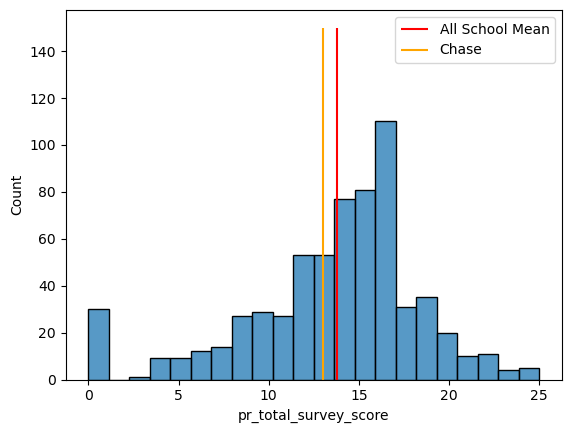

In [51]:
fig, ax = plt.subplots()
sns.histplot(pr_df["pr_total_survey_score"])
ax.vlines(total_score_mean, ymax=150, ymin=0, color='red', label="All School Mean")
ax.vlines(chase_pr_score, ymax=150, ymin=0, color='orange', label="Chase")
ax.legend()

In [ ]:
sp_df

In [59]:
chase_sp = sp_df[sp_df["short_name"]=="CHASE"]

In [78]:
chase_sp["student_count_total"] = chase_sp["student_count_total"].astype(int)

/var/folders/vk/88c8mb652jng4sjjn3c8fcd80000gn/T/ipykernel_49532/3463777575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chase_sp["student_count_total"] = chase_sp["student_count_total"].astype(int)


In [66]:
es_sp["student_count_total"] = es_sp["student_count_total"].astype(int)

/var/folders/vk/88c8mb652jng4sjjn3c8fcd80000gn/T/ipykernel_49532/173531342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  es_sp["student_count_total"] = es_sp["student_count_total"].astype(int)


In [67]:
es_sp.sort_values("student_count_total")

,school_id,legacy_unit_id,finance_id,short_name,long_name,primary_category,is_high_school,is_middle_school,is_elementary_school,is_pre_school,summary,administrator_title,administrator,secondary_contact_title,secondary_contact,address,city,state,zip,phone,fax,cps_school_profile,website,attendance_boundaries,grades_offered_all,grades_offered,student_count_total,student_count_low_income,student_count_special_ed,student_count_english_learners,student_count_black,student_count_hispanic,student_count_white,student_count_asian,student_count_native_american,student_count_other_ethnicity,student_count_asian_pacific,student_count_multi,student_count_hawaiian_pacific,student_count_ethnicity_not,statistics_description,demographic_description,dress_code,prek_school_day,kindergarten_school_day,school_hours,earliest_drop_off_time,title_1_eligible,transportation_bus,transportation_el,overall_rating,rating_status,rating_statement,classification_description,school_year,network,is_gocps_participant,is_gocps_prek,is_gocps_elementary,is_gocps_high_school,open_for_enrollment_date,school_latitude,school_longitude,location,multisensory,significantlymodifiedmod,transition,facebook,classroom_languages,bilingual_services,third_contact_title,third_contact_name,after_school_hours,twitter,preschool_inclusive,preschool_instructional,refugee_services,college_enrollment_rate_school,college_enrollment_rate_mean,graduation_rate_school,graduation_rate_mean,fourth_contact_title,fourth_contact_name,fifth_contact_title,fifth_contact_name,transportation_metra,sixth_contact_title,sixth_contact_name,seventh_contact_title,seventh_contact_name,significantly_modified,visual_impairments,freshman_start_end_time,youtube,pinterest,closed_for_enrollment_date,hard_of_hearing
108,400043,8067,0,HOPE LEARNING ACADEMY,Hope Institute Learning Academy,ES,False,False,True,False,<p>The Hope Learning Academy (HLA) is a partne...,Principal,NaN,Assistant Principal,Nicole Johnson,1628 W WASHINGTON,Chicago,Illinois,60612,7735347405,7735347623,{'url': 'https://www.cps.edu/schools/schoolpro...,{'url': 'https://hope.us/hlachicago'},False,"K,1,2,3,4,5",K-5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,There is not any Demographic information for t...,True,NaN,Full Day,7:40 AM-3:00 PM; Tuesdays = 2:20pm dismissal,7:40 AM,True,NaN,"Blue,Green,Pink,Brown",Inability to Rate,GOOD STANDING,"Due to the effects of COVID-19, there is no sc...",Schools that are operated by private entities ...,School Year 2022-2023,Contract,False,False,False,False,2009-07-01T00:00:00.000,41.883362,-87.668077,"{'type': 'Point', 'coordinates': [-87.668077, ...",0,0,0,{'url': 'https://www.facebook.com/Hope-Institu...,NaN,True,School Clerk,Benita Griffin,03:30 PM-05:00 PM,{'url': 'https://twitter.com/hilachicago'},NaN,NaN,True,NaN,NaN,NaN,NaN,Recruitment and Admissions,Victor Ramos,Case Manager,Patricia Kolakowski,Union Pacific West (UP-W),Social Worker,Nora Chapman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-01T00:00:00.000,NaN
64,610572,9637,66011,SAFE ACHIEVE ES,Safe Achieve Academy Elementary,ES,False,True,True,False,School Summary coming soon.,Principal,Joseph Haley,NaN,NaN,7877 S COLES AVE,Chicago,Illinois,60649,7739022487,7739027961,{'url': 'https://www.cps.edu/schools/schoolpro...,{'url': 'https://sesischools.com/locations/saf...,False,"4,5,6,7,8",8-Apr,2,2,0,0,1,1,0,0,0,0,0,0,0,0,There are 2 students enrolled at SAFE ACHIEVE ...,The largest demographic at SAFE ACHIEVE ES is ...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inability to Rate,NOT APPLICABLE,"Due to the effects of COVID-19, there is no sc...",Schools that have their own processes for enro...,School Year 2022-2023,Options,False,False,False,False,2013-07-01T00:00:00.000,41.753117,-87.550513,"{'type': 'Point', 'coordinates': [-87.550513, ...",0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,610131,5450,24981,PLAMONDON,Ambrose Plamondon Elementary School,ES,False,True,True,False,Plamondon STEM Elementary Scho

In [84]:
### School Size
es_pop_mean = es_sp["student_count_total"].mean()

In [72]:
es_sp["student_count_total"].min()

0

In [73]:
chase_sp["student_count_total"]

567    390
Name: student_count_total, dtype: object

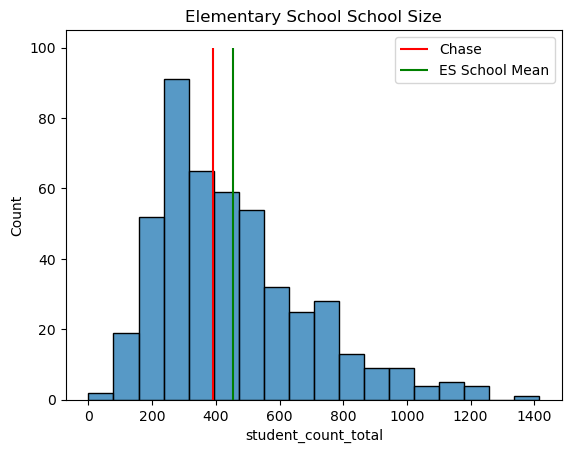

In [86]:
fig, ax = plt.subplots()
sns.histplot(es_sp["student_count_total"], ax=ax)
ax.vlines(chase_sp["student_count_total"], ymin=0, ymax=100, color='red', label="Chase")
ax.vlines(es_pop_mean, ymin=0, ymax=100, color='green', label="ES School Mean")

ax.set_title("Elementary School School Size")
ax.legend()